In [220]:
import random
import numpy as np

from PIL import Image, ImageDraw


def pointillism_effect(img, n_points: int, min_alpha: int = 250, point_size_range: tuple[int, int] = (1, 5), sub_matrix_size: int = 5) -> Image:
    m_img_source = np.array(img)
    img_canvas = Image.new("RGBA", size=img_source.size, color="white")
    canvas = ImageDraw.Draw(img_canvas)
    
    for _ in range(n_points):
        r = random.randint(*point_size_range)
        x, y = random.randint(0, img_canvas.width - 1), random.randint(0, img_canvas.height - 1)
        
        sub_m = m_img_source[y:y + sub_matrix_size, x: x + sub_matrix_size]
        media_color = np.median(sub_m, axis=0).astype(int)[0]
        
        alpha = random.randint(min_alpha, 255)
        fill_color = (*media_color, alpha)
        xyr = x - r, y - r, x + r, y + r
        
        canvas.ellipse(xyr, fill=fill_color)
        
    return img_canvas


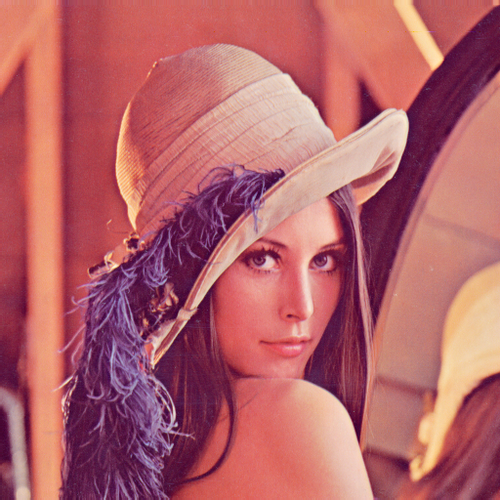

In [221]:
FILENAME = "resources/lenna.png"

img_source = Image.open(FILENAME).convert("RGB")
img_source

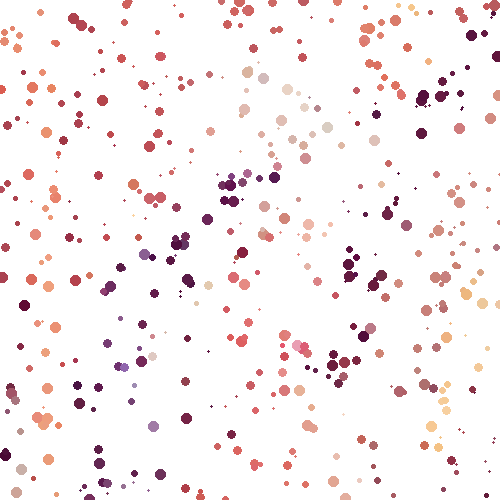

In [222]:
pointillism_effect(img_source, 500, sub_matrix_size=3)

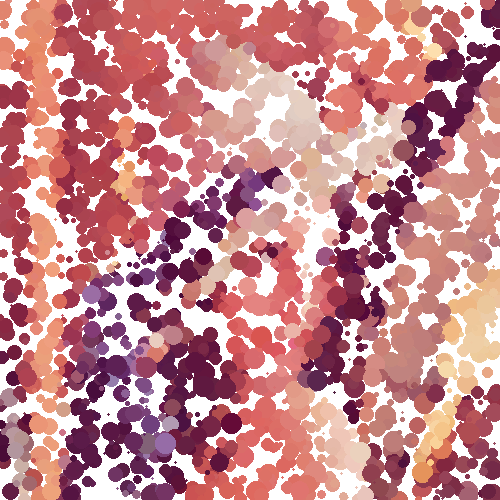

In [223]:
pointillism_effect(img_source, 2500, sub_matrix_size=5, point_size_range=(1, 10))

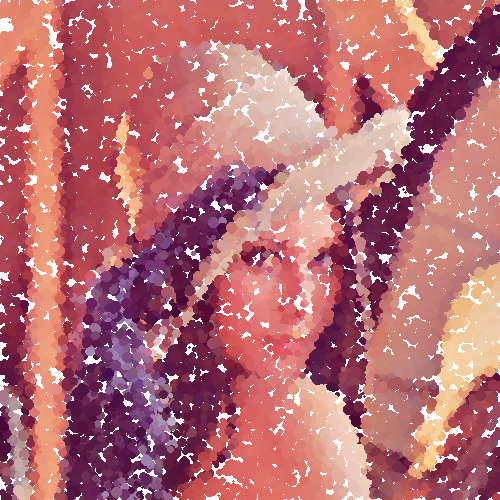

In [224]:
pointillism_effect(img_source, 15000, sub_matrix_size=5)

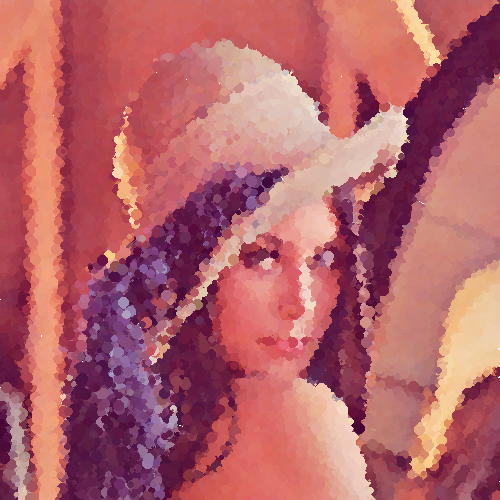

In [225]:
pointillism_effect(img_source, 50000, sub_matrix_size=5)

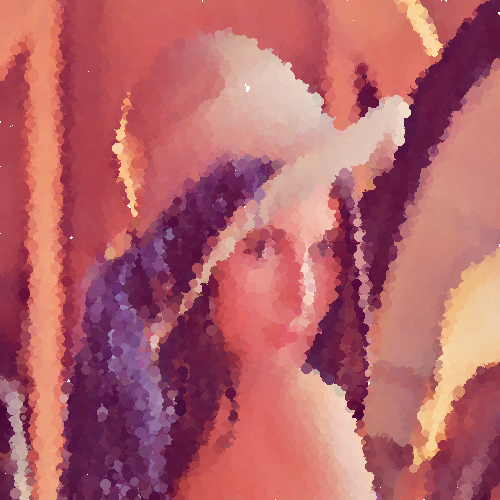

In [227]:
pointillism_effect(img_source, 50000, sub_matrix_size=25)